> # **ASSIGNMENT 3**
> #### **DSAI 302 Spring 2024**


Please write your name and student number.

>**Name**: Ahmet Yusuf Öztürk
>
>**Student Number**: 2020205063

The full assignment is worth 100 points in total. Please write your answers within the correct exercise sections. This asssignment consists of two parts. The first part includes tasks using SciPy and the second part has tasks using SciKit Learn


> # **PART 1**

1. Using fetch_california_housing function, import the dataset from sklearn dataset.

In [2]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

X, y = housing.data, housing.target

2. Call the fetch_california_housing() function and create. Show the first five columns. Make sure that all the columns have their titles, including target column (here you will have to understand what "target" mean from the description of the dataset and assign a good-looking title for that column).

In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

df['MedianHouseValue'] = housing.target

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422

3. Split the dataset into train and test sets using the ratio of 0.2.

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

4. Apply proper standardization for both the sets

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = train_df.drop(columns=['MedianHouseValue'])
y_train = train_df['MedianHouseValue']
X_test = test_df.drop(columns=['MedianHouseValue'])
y_test = test_df['MedianHouseValue']


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

5. Convert your sets into tensors so that they will be compatible with the pytorch model.

In [6]:
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [7]:
print("Training feature tensor shape:", X_train_tensor.shape)
print("Training target tensor shape:", y_train_tensor.shape)
print("Test feature tensor shape:", X_test_tensor.shape)
print("Test target tensor shape:", y_test_tensor.shape)

Training feature tensor shape: torch.Size([16512, 8])
Training target tensor shape: torch.Size([16512, 1])
Test feature tensor shape: torch.Size([4128, 8])
Test target tensor shape: torch.Size([4128, 1])


6. Create a 2-layer Pytorch ANN model with neuron numbers of (8,10,10,1), the first 8 are for the inputs and the last 1 is for the output. Use ReLU as activation function.

In [8]:
import torch.nn as nn
import torch.optim as optim

class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(8, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = ANNModel()

7. Train the model using MSE loss as a criterion, RMSprop as an optimizer. Try different epoch numbers, in which epoch were you able to reach the lowest test error?

In [9]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 100
train_losses = []
test_losses = []
best_test_loss = float('inf')
best_epoch = -1


for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

        if test_loss.item() < best_test_loss:
            best_test_loss = test_loss.item()
            best_epoch = epoch + 1

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {loss.item():.4f}, '
              f'Test Loss: {test_loss.item():.4f}')

print(f'\nLowest Test Loss: {best_test_loss:.4f} at Epoch {best_epoch}')

Epoch [10/100], Train Loss: 4.7983, Test Loss: 4.6991
Epoch [20/100], Train Loss: 4.5986, Test Loss: 4.5053
Epoch [30/100], Train Loss: 4.3925, Test Loss: 4.3036
Epoch [40/100], Train Loss: 4.1757, Test Loss: 4.0896
Epoch [50/100], Train Loss: 3.9454, Test Loss: 3.8599
Epoch [60/100], Train Loss: 3.6982, Test Loss: 3.6118
Epoch [70/100], Train Loss: 3.4336, Test Loss: 3.3462
Epoch [80/100], Train Loss: 3.1538, Test Loss: 3.0663
Epoch [90/100], Train Loss: 2.8631, Test Loss: 2.7771
Epoch [100/100], Train Loss: 2.5670, Test Loss: 2.4857

Lowest Test Loss: 2.4857 at Epoch 100


In [11]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 2.4857


8. Now define and train another model. Now with 8,90,90,1 architecture. This time also integrate tensorboard as we did in the class. The following code may give you a hint about how to integrate. Use it inside the for loop and rename the variables. Try different epoch numbers, try to reach the best testing performance. What differences did you observe compared to the previous model?

```
writer.add_scalars('Loss', {'test' : test_loss,'train' : loss}, epoch)
```



In [12]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/california_housing_experiment')

In [13]:
class ANNModel2(nn.Module):
    def __init__(self):
        super(ANNModel2, self).__init__()
        self.fc1 = nn.Linear(8, 90)
        self.fc2 = nn.Linear(90, 90)
        self.fc3 = nn.Linear(90, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model2 = ANNModel2()

optimizer = optim.Adam(model2.parameters(), lr=0.001)
criterion = nn.MSELoss()

best_test_loss2 = float('inf')
best_epoch2 = -1
num_epochs = 100

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model2.train()
    optimizer.zero_grad()
    outputs2 = model2(X_train_tensor)
    loss = criterion(outputs2, y_train_tensor)

    loss.backward()
    optimizer.step()

    model2.eval()
    with torch.no_grad():
        test_outputs2 = model2(X_test_tensor)
        test_loss2 = criterion(test_outputs2, y_test_tensor)

        if test_loss2.item() < best_test_loss2:
            best_test_loss2 = test_loss2.item()
            best_epoch2 = epoch + 1

    writer.add_scalar('Loss/Train', loss.item(), epoch)
    writer.add_scalar('Loss/Test', test_loss2.item(), epoch)

    train_losses.append(loss.item())
    test_losses.append(test_loss2.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {loss.item():.4f}, '
              f'Test Loss: {test_loss2.item():.4f}')

writer.close()

print(f'\nLowest Test Loss: {best_test_loss2:.4f} at Epoch {best_epoch2}')


Epoch [10/100], Train Loss: 3.7408, Test Loss: 3.5425
Epoch [20/100], Train Loss: 2.3224, Test Loss: 2.2803
Epoch [30/100], Train Loss: 1.5378, Test Loss: 1.4904
Epoch [40/100], Train Loss: 1.0073, Test Loss: 0.9653
Epoch [50/100], Train Loss: 0.7776, Test Loss: 0.7748
Epoch [60/100], Train Loss: 0.7163, Test Loss: 0.7252
Epoch [70/100], Train Loss: 0.6652, Test Loss: 0.6718
Epoch [80/100], Train Loss: 0.6144, Test Loss: 0.6225
Epoch [90/100], Train Loss: 0.5768, Test Loss: 0.5866
Epoch [100/100], Train Loss: 0.5442, Test Loss: 0.5555

Lowest Test Loss: 0.5555 at Epoch 100


Show the training and test plots


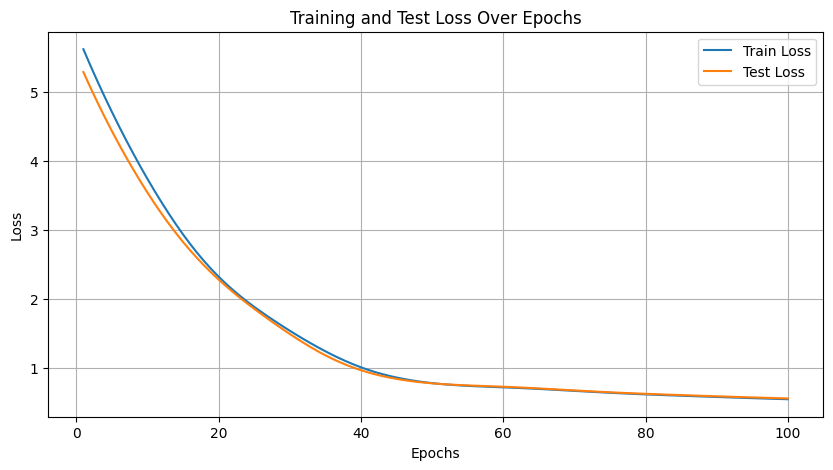

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


9. Show the TensorBoard

In [15]:
%load_ext tensorboard

%tensorboard --logdir runs

<IPython.core.display.Javascript object>

10. Now imagine that you will live the rest of your life in California, dream a house you will be living in and note down its features, according to the columns of the dataset. Create an array consisting of those values that forms an entry for this dataset. And finally, Get the model predict how much money you would need to realize your dream. An example for such input array is:
```
x =np.array([[3.0125,52.0,4.941781,1.065068,660.0,2.260274,37.83,-122.26]])
```
Also use the following code:
```
x = scaler.transform(x)
x = torch.tensor(x, dtype=torch.float32)
y = model(x)
```
and print y.




In [16]:
import numpy as np


x =np.array([[3.0125,52.0,4.941781,1.065068,660.0,2.260274,37.83,-122.26]])
x = scaler.transform(x)
x = torch.tensor(x, dtype=torch.float32)
y = model2(x)

print("Predicted price for your dream house in California:", int(y.item()*10**6),"USD")


Predicted price for your dream house in California: 2269474 USD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


> # **PART 2**



In this part you will be using Kuzushiji-MNIST dataset in which 10 of Hiragana characters are used. It is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format.

(See the dataset: https://github.com/rois-codh/kmnist/blob/master/images/kmnist_examples.png)

It is also available in torchvision.datasets with the name of KMINST.

First connect to a GPU in from Google Colab and check if CUDA is available and get the details with !nvidia-smi.(See PyTorch2 lecture)

In [17]:
import torch

if torch.cuda.is_available():
  !nvidia-smi


Sun May 19 17:09:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


Before loading the data, you should define a transform function. Remember that in PyTorch2 lecture, we defined a transform in which the images both rotated and flipped for data augmentation processes. For object or animal images, flipping the original image might be a good strategy to enrich the data. However, for handwriting images, flipping images will not improve the performance, because no flipped images will be present in the dataset. However, rotating to a small degree might be useful because writers might not produce the perfectly aligned characters.

For this purpose, define a transform and include three arguments for the followings:
- Random rotation to 5 degrees
- Normalization
- Converting the images to tensors

In [19]:
import torchvision.transforms as transforms
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader, random_split
transform = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



Load train set and test set as kmnist_trainset and kmnist_testset, respectively using **datasets.KMNIST** function. (Hint: you will use the "train=" argument to get train and test data. It should be True for training data and False for test data.)

In [20]:
kmnist_trainset = KMNIST(root='./data', train=True, download=True, transform=transform)
kmnist_testset = KMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 18165135/18165135 [00:13<00:00, 1316340.70it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 201442.91it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 862438.78it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 5267313.34it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



Split the test set as kmnist_valset and kmnist_testset with 9/1 ratio meaning that %90 of the original test set will be used as validation set.

You can use **torch.utils.data.random_split** function to split the data.

In [21]:
test_size = len(kmnist_testset)
val_size = int(test_size * 0.9)
new_test_size = test_size - val_size

kmnist_valset, kmnist_testset = random_split(kmnist_testset, [val_size, new_test_size])

Create train_dataloader, val_dataloader and test_dataloader using **torch.utils.data.DataLoader** with the following arguments:

```
kmnist_trainset -  batch_size=64, shuffle=True
kmnist_valset   -  batch_size=32, shuffle=False
kmnist_testset  -  batch_size=32, shuffle=False
```

Print the number of images for all three datasets.

In [22]:
train_dataloader = DataLoader(kmnist_trainset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(kmnist_valset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(kmnist_testset, batch_size=32, shuffle=False)

Use the following code to see some instances of images and their labels.

```
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(kmnist_trainset), size=(1,)).item()
    img, label = kmnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

```



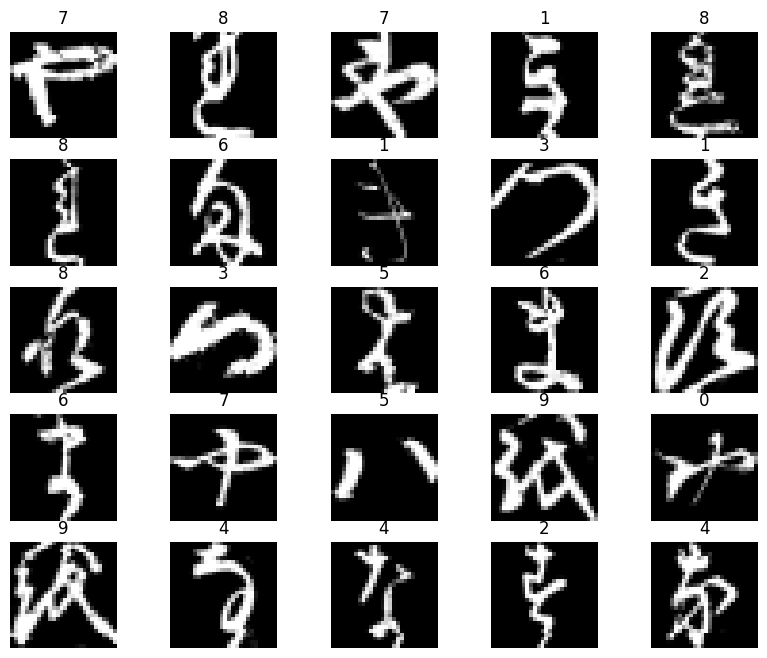

In [23]:
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(kmnist_trainset), size=(1,)).item()
    img, label = kmnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**MODELLING**


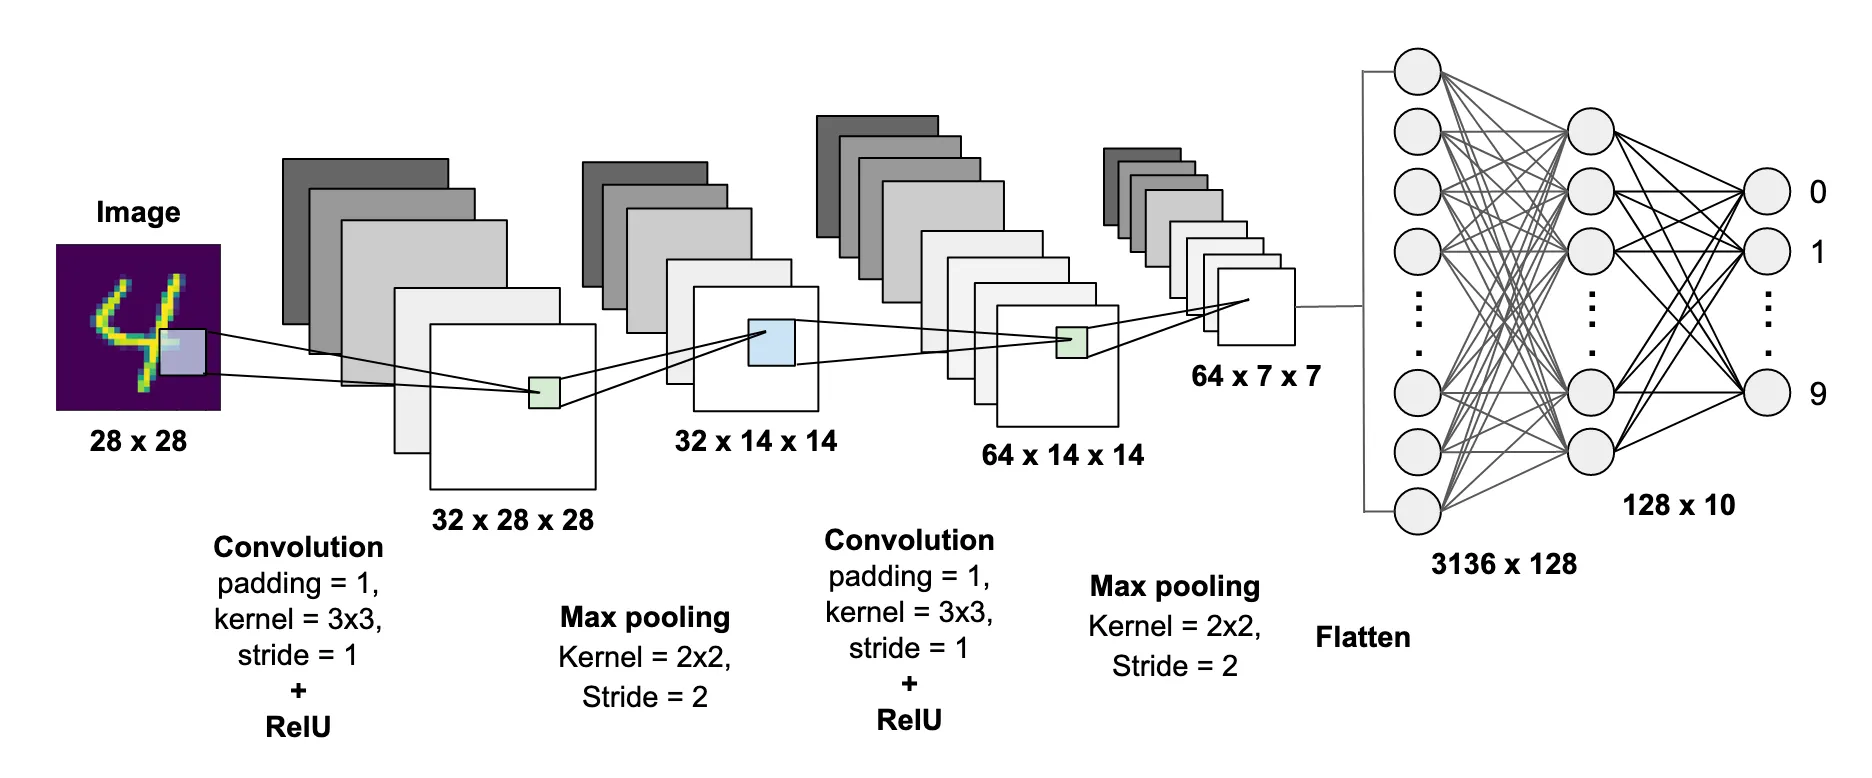

Now you will define a model with custom **nn.Module** of PyTorch. You will fill the missing parts (###) of the following code by using the information of the above structure.

Key points:

*   The original image is 28*28 pixels.
*   1st Convolution layer takes **1** image and creates **32** feature maps. (These are in_channels and out_channels numbers)
*   2nd Convolution layer takes 32 feature maps and creates 64 feature maps.
*   When defining kernel_size do not use "3x3". (See lecture notes for proper usage.)
*   When convolution phase is done, we have 64 feature maps with 7x7 pixels size. When we flatten this layer, we get 64x7x7=3136 input for FCFF (Fully Connected Feed Forward).
*   The second layer of neural network has 128 nodes.
*   The final layer of neural network has 10 nodes because we have 10 classes.
*   When defining "self.linear_1 = torch.nn.Linear(###, ###)", the first argument is the number of nodes in that layer, the second argument is the number of nodes of the following layer.
*   The activation function is ReLU.
*   The dropping rate is = 0.5

```
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=###, out_channels=###, kernel_size=###, stride=###, padding=###)
        self.conv_2 = torch.nn.Conv2d(in_channels=###, out_channels=###, kernel_size=###, stride=###, padding=###)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=###, stride=###)
        self.linear_1 = torch.nn.Linear(###, ###)    
        self.linear_2 = torch.nn.Linear(###, ###)
        self.dropout = torch.nn.Dropout(p=###)
        self.relu = torch.nn.###()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred
```



In [24]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels= 1, out_channels= 32, kernel_size= 3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels= 32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=(2,2), stride=2)
        self.linear_1 = torch.nn.Linear(3136,128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

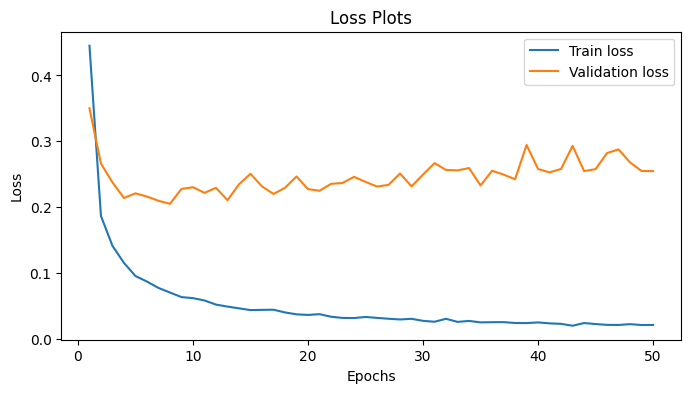

Now you will train the model with the given code below. Fill the missing parts (###) according to the following instructions.


*   Use Cross Entropy Loss as loss function.
*   Use Adam as optimizer.
*   Use learning rate = 0.001
*   Selecting the right number of epochs is tricky. Here we provide you the graph of Train and Validation Loss above for **50 epochs**. Beware of the initial decrease and increase of validation loss over time. When validation loss starts to increase while training loss decreases, it means that the model overfits the data. Due to this overfitting, both validation and test accuracy scores drop continuously. So, if we run the model with 50 epochs (as we did) and use this model for test the test data, we will be using an overfit model. Therefore, you should stop the model at the right place by selecting the correct number of epochs while training. Normally, this is done by training with high number of epochs, looking at the loss graph and selecting the right epoch and retrain it. However here, we provide you the first step. What you should do is to select an epoch number where you think the validation loss starts to increase by visualizing the graph we provided.


```
model = ###()       #Name of your model.
criterion = torch.nn.###()
optimizer = torch.optim.###(model.parameters(), lr=###)

if (torch.cuda.is_available()):
    model.cuda()

no_epochs = ###
train_loss = list()
val_loss = list()
best_val_loss = 1

for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    # training
    model.train()
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(kmnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")
```

In [25]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

if (torch.cuda.is_available()):
    model.cuda()

no_epochs = 9
train_loss = list()
val_loss = list()
best_val_loss = 1

for epoch in range(no_epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    for itr, (image, label) in enumerate(train_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)

    # validation
    model.eval()
    total = 0
    for itr, (image, label) in enumerate(val_dataloader):

        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()

        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy = total / len(kmnist_valset)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, no_epochs, total_train_loss, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
        best_val_loss = total_val_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
        torch.save(model.state_dict(), "model.dth")


Epoch: 1/9, Train Loss: 0.42885433, Val Loss: 0.34520846, Val Accuracy: 0.89422222
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.34520846

Epoch: 2/9, Train Loss: 0.17932835, Val Loss: 0.25547162, Val Accuracy: 0.92133333
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.25547162

Epoch: 3/9, Train Loss: 0.13117368, Val Loss: 0.23835217, Val Accuracy: 0.93322222
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.23835217

Epoch: 4/9, Train Loss: 0.10660695, Val Loss: 0.21234932, Val Accuracy: 0.94000000
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.21234932

Epoch: 5/9, Train Loss: 0.08923821, Val Loss: 0.20141906, Val Accuracy: 0.94633333
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.20141906

Epoch: 6/9, Train Loss: 0.08008302, Val Loss: 0.18311439, Val Accuracy: 0.94800000
Saving the model state dictionary for Epoch: 6 with Validation loss: 0.18311439

Epoch: 7/9, Tra

Plot Epochs vs Loss Graph to see the changes in train and validation losses with each epoch as in the previous step.

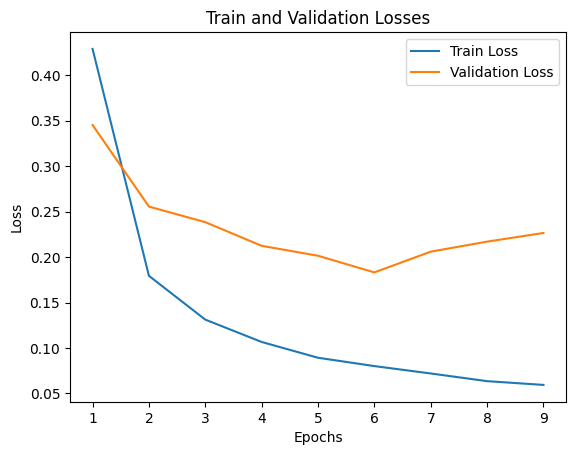

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1, no_epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, no_epochs + 1), val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Losses')
plt.legend()

plt.show()

Calculate the model accuracy by using test dataset with the following code:

```
total_acc = 0
for images,labels in test_dataloader:
  images = images.cuda()
  labels = labels.cuda()
  output = model(images)
  total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0

print("Test accuracy :",total_acc/len(test_dataloader.dataset))
```



In [27]:
total_acc = 0
for images,labels in test_dataloader:
  images = images.cuda()
  labels = labels.cuda()
  output = model(images)
  total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0

print("Test accuracy :",total_acc/len(test_dataloader.dataset))

Test accuracy : 0.948


Now, try to display 5 of test images of which predicted label does not match with its actual label. You can use your existing codes to describe the problem to ChatGPT and ask it to write a code for displaying some wrongly labelled images.

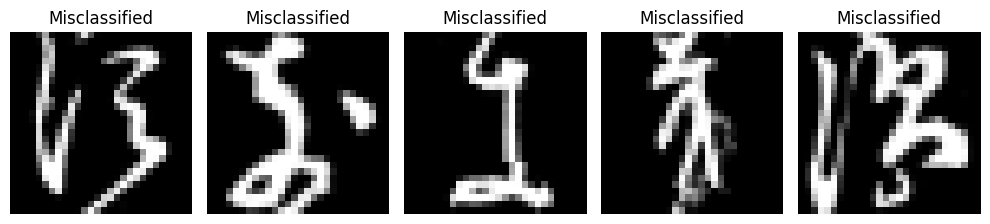

In [28]:
misclassified_images = []

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for image, label in test_dataloader:

    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():
        pred = model(image)

    pred_labels = torch.argmax(pred, dim=1)

    misclassified_mask = pred_labels != label

    misclassified_images.extend(image[misclassified_mask])

    if len(misclassified_images) >= 5:
        break

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 8))

cols, rows = 5, 1


for i in range(1, cols * rows + 1):

    image = misclassified_images[i-1].cpu().squeeze()

    figure.add_subplot(rows, cols, i)

    plt.title('Misclassified')
    plt.axis("off")

    plt.imshow(image, cmap="gray")

plt.tight_layout()
plt.show()